In [1]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
C = np.load("output/C/result/result.pkl")
H = np.load("output/H/result/result.pkl")
I = np.load("output/I/result/result.pkl")
K = np.load("output/K/result/result.pkl")

In [3]:
C = np.asarray(C["C"])
H = np.asarray(H["H"])
I = np.asarray(I["I"])
K = np.asarray(K["K"])

In [4]:
df = pd.DataFrame({
    "wl": [i for i in range(650, 1001, 10)],
    "C": C[:, 0],
    "H": H[:, 0],
    "I": I[:, 0],
    "K": K[:, 0]
})

In [5]:
df.to_csv("CHIK/sim_spec.csv", index=None)

In [6]:
from calibration import Calibrator
calib = Calibrator()

In [7]:
sim = df.iloc[:, 1:].values.T

In [8]:
# calib.get_a_b(sim, )

In [9]:
df_0111 = pd.read_csv("CHIK/20190111_IJV.csv")

In [10]:
df_0111.head()


,Wavelength (nm),PC,PH,PI,PK,WH_lie0_1,WH_lie0_2,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,539.5939,316.000000,315.666667,315.000000,323.333333,311,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,539.9378,318.666667,315.666667,314.666667,327.333333,321,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,540.2817,317.666667,312.333333,313.333333,323.333333,321,323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,540.6256,314.333333,314.000000,316.000000,324.666667,316,322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,540.9695,314.000000,317.000000,318.333333,324.666667,313,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
exp_wl = df_0111["Wavelength (nm)"].tolist()
exp = df_0111.iloc[:, 1:5].values
live = df_0111.iloc[:, 5:7].values



In [12]:
print(sim.shape)
coeff, exp = calib.get_a_b(sim, exp.T, exp_wl)

(4, 36)
(4, 36)
(4, 36)


In [13]:
coeff

array([[ 5.36267371e-12, -1.97408520e-09],
       [ 2.14197396e-12, -8.58956337e-10],
       [ 3.21450707e-12, -1.47475958e-09],
       [ 2.60472399e-12, -1.16953965e-09],
       [ 2.45243831e-12, -1.01492476e-09],
       [ 2.46065762e-12, -1.21083916e-09],
       [ 2.61137073e-12, -1.16226660e-09],
       [ 2.24556324e-12, -8.50154393e-10],
       [ 2.28163889e-12, -1.17858965e-09],
       [ 9.91344266e-13, -2.26486701e-10],
       [ 2.29055571e-12, -8.41948092e-10],
       [ 2.61050445e-12, -1.90518402e-09],
       [ 3.16219936e-12, -3.73872545e-09],
       [ 2.70519635e-12, -3.84992827e-09],
       [ 2.14944066e-12, -3.77535009e-09],
       [ 2.27250271e-12, -4.37942989e-09],
       [ 2.41847763e-12, -6.15683141e-09],
       [ 2.96523793e-12, -8.01008439e-09],
       [ 2.72758556e-12, -7.32663110e-09],
       [ 3.44251365e-12, -8.64173686e-09],
       [ 2.71144151e-12, -6.37921041e-09],
       [ 3.78275414e-12, -1.00650772e-08],
       [ 3.81070547e-12, -7.84917963e-09],
       [ 2.

In [21]:
r_square = []

for x, y in zip(sim, exp):
    y_fit = x * coeff[:,1] + coeff[:,0]
    residual = ((y-y_fit)**2).sum()
    SS_total = ((y.mean()-y_fit)**2).sum()

    r_square.append(1 - residual/SS_total)

# r_square = np.mean(r_square)

In [22]:
r_square

[-0.5069127762014065,
 -0.42141274245851346,
 -0.31712416124067677,
 -0.32641663731332216]

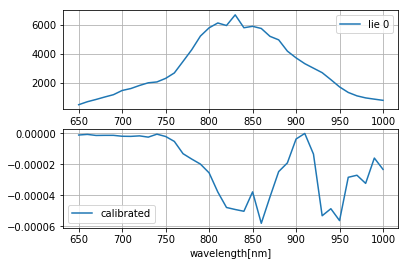

In [23]:
wl = [i for i in range(650, 1001, 10)]
live_0 = np.interp(wl, exp_wl, live[:, 0])
live_1 = np.interp(wl, exp_wl, live[:, 1])

fig, ax = plt.subplots(2, 1)
ax[0].plot(wl, live_0, label="lie 0")
ax[1].plot(wl, live_0*coeff[:,0] + coeff[:,1], label="calibrated")
# plt.plot(wl, live_1, label="lie 1")
# plt.plot(live[:, 0], label="lie 0")

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel("wavelength[nm]")
plt.show()

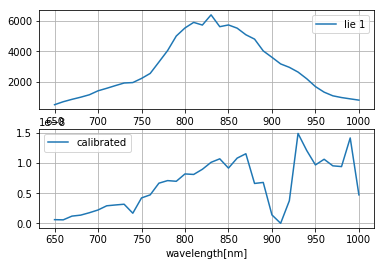

In [16]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(wl, live_1, label="lie 1")
ax[1].plot(wl, live_1*coeff[:,0] + coeff[:,1], label="calibrated")
# plt.plot(wl, live_1, label="lie 1")
# plt.plot(live[:, 0], label="lie 0")

ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
ax[1].set_xlabel("wavelength[nm]")
plt.show()

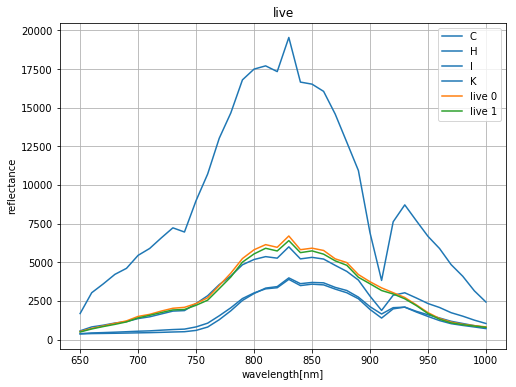

In [39]:
fig = plt.figure(figsize=(8, 6))
for p, m in zip(["C","H","I","K"], exp):
    plt.plot(wl, m, label=p, color="C0")

# plt.plot(wl, live_0*coeff[:,0] + coeff[:,1], label="live 0", color="C1")
# plt.plot(wl, live_1*coeff[:,0] + coeff[:,1], label="live 1", color="C2")
plt.plot(wl, live_0, label="live 0", color="C1")
plt.plot(wl, live_1, label="live 1", color="C2")

plt.grid()
plt.legend()
plt.title("live")
plt.xlabel("wavelength[nm]")
plt.ylabel("reflectance")
plt.show()

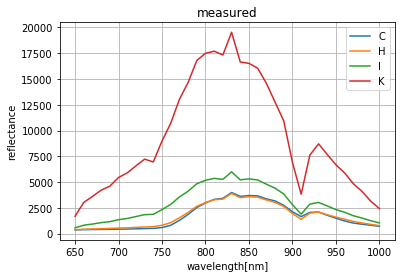

In [31]:
for p, e in zip(["C","H","I","K"], exp):
    plt.plot(wl, e, label=p)
plt.grid()
plt.legend()
plt.title("measured")
plt.xlabel("wavelength[nm]")
plt.ylabel("reflectance")
plt.show()